In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import add_dummy_feature
sns.set_theme()

In [2]:
m = 200
rng = np.random.default_rng()
X = 2 * rng.random((m,1))
X_b = add_dummy_feature(X)
y = 4 + X + rng.standard_normal((m,1))
epochs = 1000

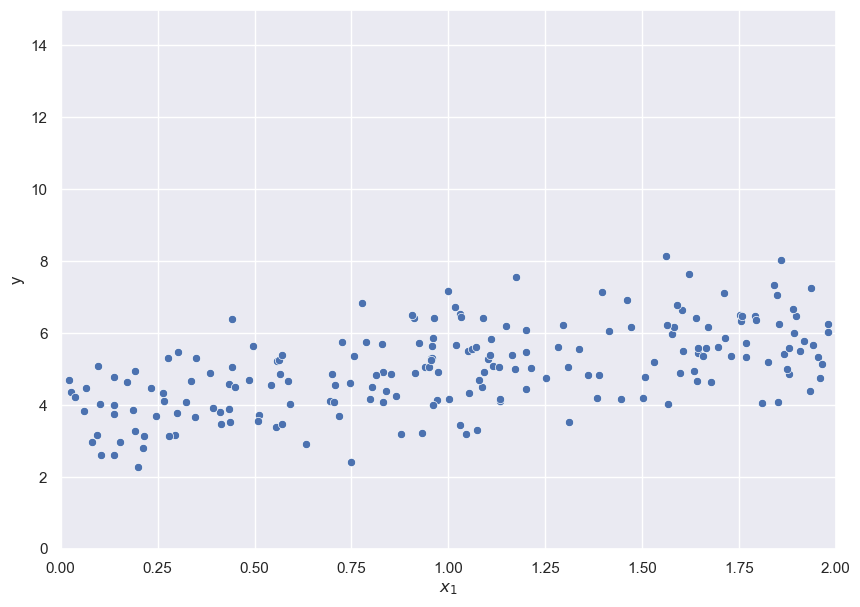

In [3]:
fig, ax = plt.subplots(figsize = (10,7))

sns.scatterplot(x=X.flatten(), y=y.flatten(), ax=ax)
plt.xlabel('$x_1$')
plt.ylabel('y')
plt.axis([0,2,0,15])
plt.show()

In [4]:
theta =  rng.standard_normal((2,1))
eta = 0.1
theta

array([[0.26458495],
       [0.96720319]])

In [5]:
J = np.zeros(epochs)


for i in range(epochs):
    indices_rng = rng.choice(range(m), size=m, replace=False)
    rng_X_b = X_b[indices_rng]
    rng_y = y[indices_rng]

    X_batch = [rng_X_b[i:i+32] for i in range(0, len(rng_X_b), 32)]
    y_batch = [rng_y[i:i+32] for i in range(0, len(rng_y), 32)]
    J_batch = 0
    for k in range(len(X_batch)):
        gradients = 2/32 * X_batch[k].T @ (X_batch[k] @ theta - y_batch[k])
        theta -= eta*gradients
        J_batch += (1/32)*((X_batch[k]@theta - y_batch[k])**2).sum()
    
    J[i] = J_batch / len(X_batch)
theta

array([[3.81476801],
       [1.14809839]])

In [6]:
y_prediccion = X_b @ theta

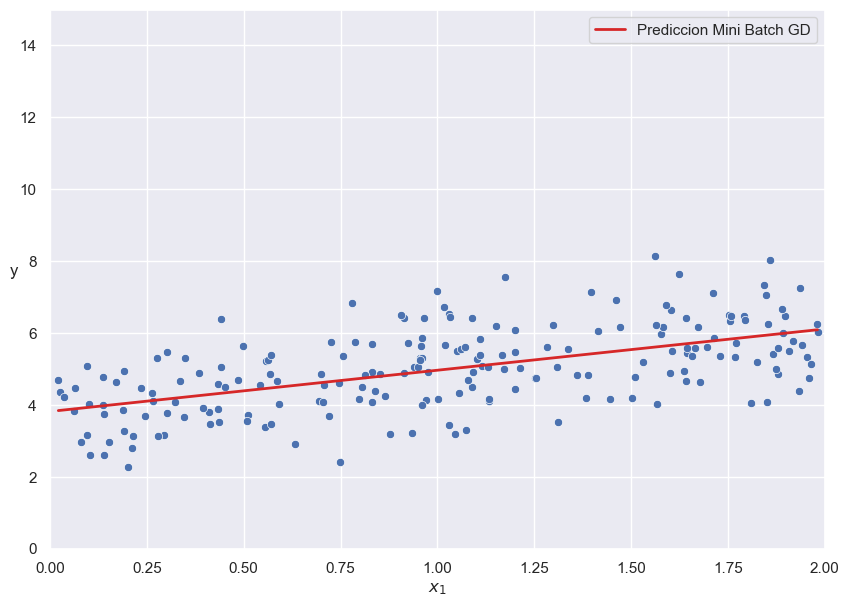

In [7]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(x=X.flatten(), y=y.flatten(), ax=ax)
sns.lineplot(x=X.flatten(), y=y_prediccion.flatten(), color='tab:red', linewidth=2, label='Prediccion Mini Batch GD')
plt.xlabel('$x_1$')
plt.ylabel('y', rotation=0)
plt.axis([0,2,0,15])
plt.show()

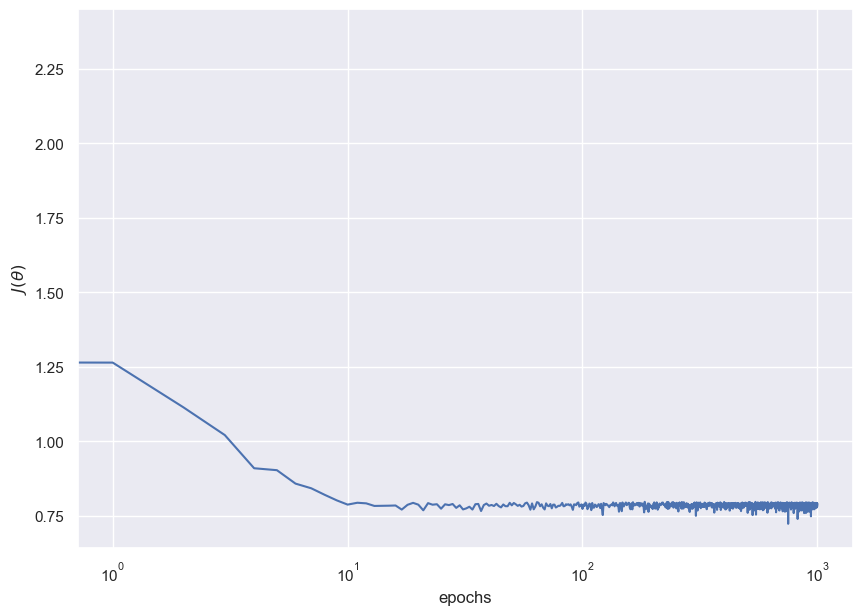

In [8]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(x=np.arange(epochs), y=J)
plt.xlabel('epochs')
plt.ylabel(r'$J(\theta)$')
plt.xscale('log')
plt.show()